# 구글 드라이브 마운트

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/project')

Mounted at /content/drive


# 라이브러리

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.1 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Komoran
import pandas as pd

# Text preprocessing
import nltk
from nltk.tokenize import sent_tokenize # 문장 토큰화
from nltk.tokenize import word_tokenize # 단어 토큰화
from nltk.tokenize import WordPunctTokenizer # 단어 토큰화 (특수문자 포함)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

# WordCloud
from collections import Counter
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go

# Sentimental Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# 데이터 불러오기

In [ ]:
lyrics = pd.read_csv('data/final_data_senti.csv')
lyrics

,Unnamed: 0,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
0,0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,I'm friends with the monster\nThat's under my ...,랩/힙합,110.009,...,Cyan Muted Medium,Cyan Vibrant Light,"(186, 97, 156)","(39, 83, 108)","(138, 208, 228)",1.0,0.125,0.703,0.172,0.9904
1,1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"It's going down, I'm yelling timber\nYou bette...",POP,129.992,...,Blue Medium Medium,Blue Vibrant Medium,"(18, 22, 36)","(60, 98, 156)","(184, 204, 226)",1.0,0.006,0.850,0.144,0.9958
2,2,2014,1,2,3,Counting Stars,OneRepublic,"Lately, I've been, I've been losing sleep\nDre...",랩/힙합,122.013,...,Orange Medium Dark,Orange Medium Very Dark,"(82, 68, 48)","(201, 171, 129)","(161, 153, 132)",0.0,0.144,0.779,0.077,-0.9867
3,3,2014,1,2,4,Royals,Lorde,I've never seen a diamond in the flesh \nI cut...,"POP, 록/메탈",84.876,...,Red Muted Very Dark,Red Vibrant Dark,"(151, 123, 112)","(47, 39, 32)","(233, 221, 224)",0.0,0.059,0.809,0.131,0.9887
4,4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"Say something, I'm giving up on you\nI'll be t...",발라드,141.284,...,Yellow Vibrant Medium,Cyan Medium Dark,"(33, 39, 67)","(241, 244, 229)","(91, 155, 157)",0.0,0.017,0.780,0.203,0.9771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52095,52095,2023,12,5,96,Winter Wonderland,Chloe,"[Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk...","재즈, 보컬재즈, 애시드/퓨전/팝",77.810,...,Blue Muted Dark,Red Medium Very Dark,"(200, 215, 236)","(55, 67, 84)","(110, 100, 103)",0.0,0.055,0.862,0.083,0.8405
52096,52096,2023,12,5,97,Run For The Hills,Tate McRae,"Hotels, late nights, hands through my hair\nLo...",POP,129.918,...,Purple Vibrant Very Dark,Red Medium Dark,"(31, 30, 30)","(191, 187, 195)","(175, 111, 99)",0.0,0.020,0.902,0.077,0.9676
52097,52097,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"Baby, me vuelves loco\r\nNo se esperó al hotel...","월드뮤직, 라틴",125.012,...,Blue Medium Light,Blue Medium Dark,"(161, 163, 191)","(30, 57, 153)","(83, 61, 137)",0.0,0.046,0.938,0.016,-0.7319
52098,52098,2023,12,5,99,Great Gatsby,Rod Wave,"(Pipe that shit up, TnT)\n(Trill got that juic...",POP,156.975,...,Red Medium Medium,Yellow Medium Very Dark,"(54, 32, 13)","(176, 111, 58)","(132, 132, 124)",0.0,0.191,0.743,0.066,-0.9849


In [ ]:
lyrics.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Week', 'Rank', 'Title', 'Artist',
       'Lyrics', 'Genre', 'BPM', 'Duration_sec', 'color1', 'color2', 'color3',
       'rgb1', 'rgb2', 'rgb3', 'Featuring', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [ ]:
# 텍스트 데이터 읽어오기
filename = 'data/lyrics_2023.txt'
f = open(filename, 'r')
print(f)

print('-'*10)
lyrics = f.read()
print(type(lyrics))

<_io.TextIOWrapper name='data/lyrics_2023.txt' mode='r' encoding='UTF-8'>
----------
<class 'str'>


## 전처리

In [ ]:
# 소문자로 변경
lyrics.Lyrics = lyrics.Lyrics.str.lower()
lyrics

,Unnamed: 0,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
0,0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,i'm friends with the monster\nthat's under my ...,랩/힙합,110.009,...,Cyan Muted Medium,Cyan Vibrant Light,"(186, 97, 156)","(39, 83, 108)","(138, 208, 228)",1.0,0.125,0.703,0.172,0.9904
1,1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"it's going down, i'm yelling timber\nyou bette...",POP,129.992,...,Blue Medium Medium,Blue Vibrant Medium,"(18, 22, 36)","(60, 98, 156)","(184, 204, 226)",1.0,0.006,0.850,0.144,0.9958
2,2,2014,1,2,3,Counting Stars,OneRepublic,"lately, i've been, i've been losing sleep\ndre...",랩/힙합,122.013,...,Orange Medium Dark,Orange Medium Very Dark,"(82, 68, 48)","(201, 171, 129)","(161, 153, 132)",0.0,0.144,0.779,0.077,-0.9867
3,3,2014,1,2,4,Royals,Lorde,i've never seen a diamond in the flesh \ni cut...,"POP, 록/메탈",84.876,...,Red Muted Very Dark,Red Vibrant Dark,"(151, 123, 112)","(47, 39, 32)","(233, 221, 224)",0.0,0.059,0.809,0.131,0.9887
4,4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"say something, i'm giving up on you\ni'll be t...",발라드,141.284,...,Yellow Vibrant Medium,Cyan Medium Dark,"(33, 39, 67)","(241, 244, 229)","(91, 155, 157)",0.0,0.017,0.780,0.203,0.9771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52095,52095,2023,12,5,96,Winter Wonderland,Chloe,"[intro]\r\nwalk\r\nwalk, walk, walking\r\nwalk...","재즈, 보컬재즈, 애시드/퓨전/팝",77.810,...,Blue Muted Dark,Red Medium Very Dark,"(200, 215, 236)","(55, 67, 84)","(110, 100, 103)",0.0,0.055,0.862,0.083,0.8405
52096,52096,2023,12,5,97,Run For The Hills,Tate McRae,"hotels, late nights, hands through my hair\nlo...",POP,129.918,...,Purple Vibrant Very Dark,Red Medium Dark,"(31, 30, 30)","(191, 187, 195)","(175, 111, 99)",0.0,0.020,0.902,0.077,0.9676
52097,52097,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"baby, me vuelves loco\r\nno se esperó al hotel...","월드뮤직, 라틴",125.012,...,Blue Medium Light,Blue Medium Dark,"(161, 163, 191)","(30, 57, 153)","(83, 61, 137)",0.0,0.046,0.938,0.016,-0.7319
52098,52098,2023,12,5,99,Great Gatsby,Rod Wave,"(pipe that shit up, tnt)\n(trill got that juic...",POP,156.975,...,Red Medium Medium,Yellow Medium Very Dark,"(54, 32, 13)","(176, 111, 58)","(132, 132, 124)",0.0,0.191,0.743,0.066,-0.9849


In [ ]:
## intro, chorus, verse, outro, pre-chorus, post-chorus
lyrics.Lyrics = lyrics.Lyrics.str.replace('intro', '')
lyrics.Lyrics = lyrics.Lyrics.str.replace('chorus', '')
lyrics.Lyrics = lyrics.Lyrics.str.replace('verse', '')
lyrics.Lyrics = lyrics.Lyrics.str.replace('outro', '')
lyrics.Lyrics = lyrics.Lyrics.str.replace('pre-chorus', '')
lyrics.Lyrics = lyrics.Lyrics.str.replace('post-chorus', '')
lyrics

,Unnamed: 0,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
0,0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,i'm friends with the monster\nthat's under my ...,랩/힙합,110.009,...,Cyan Muted Medium,Cyan Vibrant Light,"(186, 97, 156)","(39, 83, 108)","(138, 208, 228)",1.0,0.125,0.703,0.172,0.9904
1,1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"it's going down, i'm yelling timber\nyou bette...",POP,129.992,...,Blue Medium Medium,Blue Vibrant Medium,"(18, 22, 36)","(60, 98, 156)","(184, 204, 226)",1.0,0.006,0.850,0.144,0.9958
2,2,2014,1,2,3,Counting Stars,OneRepublic,"lately, i've been, i've been losing sleep\ndre...",랩/힙합,122.013,...,Orange Medium Dark,Orange Medium Very Dark,"(82, 68, 48)","(201, 171, 129)","(161, 153, 132)",0.0,0.144,0.779,0.077,-0.9867
3,3,2014,1,2,4,Royals,Lorde,i've never seen a diamond in the flesh \ni cut...,"POP, 록/메탈",84.876,...,Red Muted Very Dark,Red Vibrant Dark,"(151, 123, 112)","(47, 39, 32)","(233, 221, 224)",0.0,0.059,0.809,0.131,0.9887
4,4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"say something, i'm giving up on you\ni'll be t...",발라드,141.284,...,Yellow Vibrant Medium,Cyan Medium Dark,"(33, 39, 67)","(241, 244, 229)","(91, 155, 157)",0.0,0.017,0.780,0.203,0.9771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52095,52095,2023,12,5,96,Winter Wonderland,Chloe,"[]\r\nwalk\r\nwalk, walk, walking\r\nwalk, wal...","재즈, 보컬재즈, 애시드/퓨전/팝",77.810,...,Blue Muted Dark,Red Medium Very Dark,"(200, 215, 236)","(55, 67, 84)","(110, 100, 103)",0.0,0.055,0.862,0.083,0.8405
52096,52096,2023,12,5,97,Run For The Hills,Tate McRae,"hotels, late nights, hands through my hair\nlo...",POP,129.918,...,Purple Vibrant Very Dark,Red Medium Dark,"(31, 30, 30)","(191, 187, 195)","(175, 111, 99)",0.0,0.020,0.902,0.077,0.9676
52097,52097,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"baby, me vuelves loco\r\nno se esperó al hotel...","월드뮤직, 라틴",125.012,...,Blue Medium Light,Blue Medium Dark,"(161, 163, 191)","(30, 57, 153)","(83, 61, 137)",0.0,0.046,0.938,0.016,-0.7319
52098,52098,2023,12,5,99,Great Gatsby,Rod Wave,"(pipe that shit up, tnt)\n(trill got that juic...",POP,156.975,...,Red Medium Medium,Yellow Medium Very Dark,"(54, 32, 13)","(176, 111, 58)","(132, 132, 124)",0.0,0.191,0.743,0.066,-0.9849


In [ ]:
lyrics.info()

In [ ]:
lyrics[lyrics.Title == 'Linus And Lucy (Peanuts Theme)']

,Unnamed: 0,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
41636,41636,2022,1,1,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,,국외영화,81.675,...,Orange Vibrant Dark,Cyan Muted Dark,"(55, 107, 137)","(226, 215, 188)","(29, 51, 59)",0.0,0.0,0.0,0.0,0.0
46848,46848,2022,12,5,49,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,,국외영화,81.675,...,Orange Vibrant Dark,Cyan Muted Dark,"(55, 107, 137)","(226, 215, 188)","(29, 51, 59)",0.0,0.0,0.0,0.0,0.0


In [ ]:
lyrics.iloc[41636, 7] = '  '
lyrics.iloc[46848, 7] = '  '

In [ ]:
# 전체 가사 데이터 생성
lyrics_text = ''
for i in tqdm(range(len(lyrics))):
  lyrics_text = lyrics_text + '\n' + lyrics.iloc[i].Lyrics
lyrics_text

In [ ]:
lyrics_2014 = lyrics[lyrics.Year == 2014]
lyrics_2015 = lyrics[lyrics.Year == 2015]
lyrics_2016 = lyrics[lyrics.Year == 2016]
lyrics_2017 = lyrics[lyrics.Year == 2017]
lyrics_2018 = lyrics[lyrics.Year == 2018]
lyrics_2019 = lyrics[lyrics.Year == 2019]
lyrics_2020 = lyrics[lyrics.Year == 2020]
lyrics_2021 = lyrics[lyrics.Year == 2021]
lyrics_2022 = lyrics[lyrics.Year == 2022]
lyrics_2023 = lyrics[lyrics.Year == 2023]

In [ ]:
# 연도별 가사 데이터 생성
lyrics_text = ''
for i in tqdm(range(len(lyrics_2022))):
  lyrics_text = lyrics_text + '\n' + lyrics_2023.iloc[i].Lyrics
print(len(lyrics_text))

In [ ]:
with open('lyrics_2023.txt', 'w+') as file:
  file.write(lyrics_text)

# 단순 빈도 분석

## (한국어) 명사 추출

In [ ]:
komoran = Komoran()

nouns = list()

test1 = lyrics.iloc[0].Lyrics
nouns.append(komoran.nouns(test1))
nouns

[[]]

In [ ]:
test1

"I'm friends with the monster\nThat's under my bed\nGet along with the voices inside of my head\nYou're trying to save me\nStop holding your breath\nAnd you think I'm crazy\n\nYeah, you think I'm crazy (crazy)\n\n\n\n\n\nI wanted the fame, but not the cover of Newsweek\n\nOh well, guess beggers can't be choosey\n\nWanted to receive attention for my music\n\nWanted to be left alone in public excuse me\n\nBeen wanting my cake, And eat it too\n\nAnd wanting it both ways\n\nFame made me a balloon cause my ego inflated\n\nWhen I blew seep and it was confusing\n\nCause all I wanted to do is be the Bruce Lee of loose leaf\n\nAbused ink, used it as a tool when I blew steam\n\nHit the lottery (oh wee)\n\nWith what I gave up to get was bittersweet\n\nIt was like winning a huge meet\n\nIronic 'cause I think I'm getting so huge I need a shrink\n\nI'm beginning to lose sleep: one sheep, two sheep\n\nGoing cuckoo and cookey as Kool Keith\n\nBut I'm actually weirder than you think\n\nCause I'm...\n\n

## 토큰화

In [ ]:
test1 = lyrics.iloc[0].Lyrics

### 문장 토큰화

In [ ]:
sent_tokenize(test1)

["I'm friends with the monster\nThat's under my bed\nGet along with the voices inside of my head\nYou're trying to save me\nStop holding your breath\nAnd you think I'm crazy\n\nYeah, you think I'm crazy (crazy)\n\n\n\n\n\nI wanted the fame, but not the cover of Newsweek\n\nOh well, guess beggers can't be choosey\n\nWanted to receive attention for my music\n\nWanted to be left alone in public excuse me\n\nBeen wanting my cake, And eat it too\n\nAnd wanting it both ways\n\nFame made me a balloon cause my ego inflated\n\nWhen I blew seep and it was confusing\n\nCause all I wanted to do is be the Bruce Lee of loose leaf\n\nAbused ink, used it as a tool when I blew steam\n\nHit the lottery (oh wee)\n\nWith what I gave up to get was bittersweet\n\nIt was like winning a huge meet\n\nIronic 'cause I think I'm getting so huge I need a shrink\n\nI'm beginning to lose sleep: one sheep, two sheep\n\nGoing cuckoo and cookey as Kool Keith\n\nBut I'm actually weirder than you think\n\nCause I'm...",


### 단어 토큰화

In [ ]:
tokens = word_tokenize(lyrics)

In [ ]:
print(len(tokens))

2373927


In [ ]:
WordPunctTokenizer().tokenize(test1)

['I',
 "'",
 'm',
 'friends',
 'with',
 'the',
 'monster',
 'That',
 "'",
 's',
 'under',
 'my',
 'bed',
 'Get',
 'along',
 'with',
 'the',
 'voices',
 'inside',
 'of',
 'my',
 'head',
 'You',
 "'",
 're',
 'trying',
 'to',
 'save',
 'me',
 'Stop',
 'holding',
 'your',
 'breath',
 'And',
 'you',
 'think',
 'I',
 "'",
 'm',
 'crazy',
 'Yeah',
 ',',
 'you',
 'think',
 'I',
 "'",
 'm',
 'crazy',
 '(',
 'crazy',
 ')',
 'I',
 'wanted',
 'the',
 'fame',
 ',',
 'but',
 'not',
 'the',
 'cover',
 'of',
 'Newsweek',
 'Oh',
 'well',
 ',',
 'guess',
 'beggers',
 'can',
 "'",
 't',
 'be',
 'choosey',
 'Wanted',
 'to',
 'receive',
 'attention',
 'for',
 'my',
 'music',
 'Wanted',
 'to',
 'be',
 'left',
 'alone',
 'in',
 'public',
 'excuse',
 'me',
 'Been',
 'wanting',
 'my',
 'cake',
 ',',
 'And',
 'eat',
 'it',
 'too',
 'And',
 'wanting',
 'it',
 'both',
 'ways',
 'Fame',
 'made',
 'me',
 'a',
 'balloon',
 'cause',
 'my',
 'ego',
 'inflated',
 'When',
 'I',
 'blew',
 'seep',
 'and',
 'it',
 'was',


### 정규표현식 토크나이즈
---
패턴, 불용어 등 분석에 의미없는 단어 제거

In [ ]:
tokenizer = RegexpTokenizer('[\w"]+')
tokens = tokenizer.tokenize(lyrics.lower())
tokens

['i',
 'm',
 'friends',
 'with',
 'the',
 'monster',
 'that',
 's',
 'under',
 'my',
 'bed',
 'get',
 'along',
 'with',
 'the',
 'voices',
 'inside',
 'of',
 'my',
 'head',
 'you',
 're',
 'trying',
 'to',
 'save',
 'me',
 'stop',
 'holding',
 'your',
 'breath',
 'and',
 'you',
 'think',
 'i',
 'm',
 'crazy',
 'yeah',
 'you',
 'think',
 'i',
 'm',
 'crazy',
 'crazy',
 'i',
 'wanted',
 'the',
 'fame',
 'but',
 'not',
 'the',
 'cover',
 'of',
 'newsweek',
 'oh',
 'well',
 'guess',
 'beggers',
 'can',
 't',
 'be',
 'choosey',
 'wanted',
 'to',
 'receive',
 'attention',
 'for',
 'my',
 'music',
 'wanted',
 'to',
 'be',
 'left',
 'alone',
 'in',
 'public',
 'excuse',
 'me',
 'been',
 'wanting',
 'my',
 'cake',
 'and',
 'eat',
 'it',
 'too',
 'and',
 'wanting',
 'it',
 'both',
 'ways',
 'fame',
 'made',
 'me',
 'a',
 'balloon',
 'cause',
 'my',
 'ego',
 'inflated',
 'when',
 'i',
 'blew',
 'seep',
 'and',
 'it',
 'was',
 'confusing',
 'cause',
 'all',
 'i',
 'wanted',
 'to',
 'do',
 'is',
 '

한 글자 제거? 필요없을 것 같음

## 노이즈, 불용어 제거

In [ ]:
en_stops = set(stopwords.words('english'))

# 불용어를 제외한 단어 추출
res = [word for word in tokens if word not in en_stops]
res

['friends',
 'monster',
 'bed',
 'get',
 'along',
 'voices',
 'inside',
 'head',
 'trying',
 'save',
 'stop',
 'holding',
 'breath',
 'think',
 'crazy',
 'yeah',
 'think',
 'crazy',
 'crazy',
 'wanted',
 'fame',
 'cover',
 'newsweek',
 'oh',
 'well',
 'guess',
 'beggers',
 'choosey',
 'wanted',
 'receive',
 'attention',
 'music',
 'wanted',
 'left',
 'alone',
 'public',
 'excuse',
 'wanting',
 'cake',
 'eat',
 'wanting',
 'ways',
 'fame',
 'made',
 'balloon',
 'cause',
 'ego',
 'inflated',
 'blew',
 'seep',
 'confusing',
 'cause',
 'wanted',
 'bruce',
 'lee',
 'loose',
 'leaf',
 'abused',
 'ink',
 'used',
 'tool',
 'blew',
 'steam',
 'hit',
 'lottery',
 'oh',
 'wee',
 'gave',
 'get',
 'bittersweet',
 'like',
 'winning',
 'huge',
 'meet',
 'ironic',
 'cause',
 'think',
 'getting',
 'huge',
 'need',
 'shrink',
 'beginning',
 'lose',
 'sleep',
 'one',
 'sheep',
 'two',
 'sheep',
 'going',
 'cuckoo',
 'cookey',
 'kool',
 'keith',
 'actually',
 'weirder',
 'think',
 'cause',
 'friends',
 'm

## POS tagging: 품사 추출

In [ ]:
token_pos = nltk.pos_tag(res)
token_pos

[('friends', 'NNS'),
 ('monster', 'RBR'),
 ('bed', 'NN'),
 ('get', 'VB'),
 ('along', 'IN'),
 ('voices', 'NNS'),
 ('inside', 'IN'),
 ('head', 'NN'),
 ('trying', 'VBG'),
 ('save', 'JJ'),
 ('stop', 'VBN'),
 ('holding', 'VBG'),
 ('breath', 'NN'),
 ('think', 'VBP'),
 ('crazy', 'JJ'),
 ('yeah', 'NN'),
 ('think', 'VBP'),
 ('crazy', 'JJ'),
 ('crazy', 'NN'),
 ('wanted', 'VBD'),
 ('fame', 'NN'),
 ('cover', 'NN'),
 ('newsweek', 'NN'),
 ('oh', 'RB'),
 ('well', 'RB'),
 ('guess', 'JJ'),
 ('beggers', 'NNS'),
 ('choosey', 'VBP'),
 ('wanted', 'VBD'),
 ('receive', 'JJ'),
 ('attention', 'NN'),
 ('music', 'NN'),
 ('wanted', 'VBD'),
 ('left', 'VBD'),
 ('alone', 'RB'),
 ('public', 'JJ'),
 ('excuse', 'NN'),
 ('wanting', 'VBG'),
 ('cake', 'NN'),
 ('eat', 'NN'),
 ('wanting', 'VBG'),
 ('ways', 'NNS'),
 ('fame', 'NN'),
 ('made', 'VBD'),
 ('balloon', 'NN'),
 ('cause', 'NN'),
 ('ego', 'NN'),
 ('inflated', 'VBD'),
 ('blew', 'JJ'),
 ('seep', 'JJ'),
 ('confusing', 'NN'),
 ('cause', 'NN'),
 ('wanted', 'VBD'),
 ('bruce

In [ ]:
nouns = list()
for word, pos in tokens_pos:
  if 'NN' in pos:
    nouns.append(word)
nouns

['friends',
 'bed',
 'voices',
 'head',
 'breath',
 'yeah',
 'crazy',
 'fame',
 'cover',
 'newsweek',
 'beggers',
 'attention',
 'music',
 'excuse',
 'cake',
 'eat',
 'ways',
 'fame',
 'balloon',
 'cause',
 'ego',
 'confusing',
 'cause',
 'bruce',
 'lee',
 'leaf',
 'ink',
 'tool',
 'steam',
 'hit',
 'lottery',
 'wee',
 'bittersweet',
 'meet',
 'cause',
 'need',
 'sheep',
 'sheep',
 'cuckoo',
 'kool',
 'keith',
 'think',
 'cause',
 'voices',
 'head',
 'breath',
 'yeah',
 'nothing',
 'nothing',
 'poet',
 'somebody',
 'moment',
 'squander',
 'cause',
 'tomorrow',
 'conjuring',
 'thoughts',
 'ponder',
 'wonder',
 'mind',
 'way',
 'yonder',
 'jeff',
 'vanvonderen',
 'cause',
 'intervene',
 'monster',
 'conflict',
 'cause',
 'thing',
 'love',
 'conquer',
 'ocd',
 'head',
 'nobody',
 'home',
 'voice',
 'head',
 'messenger',
 'friends',
 'monster',
 'voices',
 'head',
 'breath',
 'yeah',
 'nothing',
 'nothing',
 'call',
 'vision',
 'day',
 'civilian',
 'drums',
 'emcees',
 'days',
 'track',
 '

## 정규화
---
자연어 처리에서 단어의 어간을 추출하는 과정, 단어의 어미를 제거 후, 단어의 기본 형태 찾아내기

In [ ]:
# poterStemmer

stem = PorterStemmer()
print(f"start: {stem.stem('start')}")
print(f"starts: {stem.stem('starts')}")
print(f"started: {stem.stem('started')}")

start: start
starts: start
started: start


In [ ]:
# LancasterStemmer

lstem = LancasterStemmer()
print(f"start: {lstem.stem('start')}")
print(f"starts: {lstem.stem('started')}")


start: start
starts: start


In [ ]:
stem = LancasterStemmer()
res_normalized = list()
for word in res:
  new_word = stem.stem(word)
  res_normalized.append(new_word)

In [ ]:
res_normalized

['friend',
 'monst',
 'bed',
 'get',
 'along',
 'voic',
 'insid',
 'head',
 'try',
 'sav',
 'stop',
 'hold',
 'brea',
 'think',
 'crazy',
 'yeah',
 'think',
 'crazy',
 'crazy',
 'want',
 'fam',
 'cov',
 'newsweek',
 'oh',
 'wel',
 'guess',
 'beg',
 'choosey',
 'want',
 'receiv',
 'at',
 'mus',
 'want',
 'left',
 'alon',
 'publ',
 'excus',
 'want',
 'cak',
 'eat',
 'want',
 'way',
 'fam',
 'mad',
 'balloon',
 'caus',
 'ego',
 'infl',
 'blew',
 'seep',
 'confus',
 'caus',
 'want',
 'bruc',
 'lee',
 'loos',
 'leaf',
 'abus',
 'ink',
 'us',
 'tool',
 'blew',
 'steam',
 'hit',
 'lottery',
 'oh',
 'wee',
 'gav',
 'get',
 'bittersweet',
 'lik',
 'win',
 'hug',
 'meet',
 'iron',
 'caus',
 'think',
 'get',
 'hug',
 'nee',
 'shrink',
 'begin',
 'los',
 'sleep',
 'on',
 'sheep',
 'two',
 'sheep',
 'going',
 'cuckoo',
 'cookey',
 'kool',
 'kei',
 'act',
 'weird',
 'think',
 'caus',
 'friend',
 'monst',
 'bed',
 'get',
 'along',
 'voic',
 'insid',
 'head',
 'try',
 'sav',
 'stop',
 'hold',
 'brea',

### Lemmatization
---
각 word의 원형 찾기, 명사의 경우는 복수 -> 단수 형태로

In [ ]:
token_pos_df = pd.DataFrame(token_pos, columns = ['token', 'POS'])
token_pos_df

,token,POS
0,friends,NNS
1,monster,RBR
2,bed,NN
3,get,VB
4,along,IN
...,...,...
1027223,go,JJ
1027224,school,NN
1027225,want,VBP
1027226,break,NN


In [ ]:
token_pos_df.POS.unique()

array(['VBP', 'NNS', 'NN', 'POS', 'IN', 'VBG', 'JJ', 'VBN', ',', '(', ')',
       'VBD', 'RB', 'MD', 'VB', ':', 'CD', 'JJR', 'VBZ', 'UH', '.', 'RP',
       "''", 'DT', 'PRP', 'RBR', 'EX', 'FW', 'CC', 'JJS', 'NNP', 'TO',
       '$', '``', 'WP', 'WRB', 'WP$', 'WDT', 'PRP$', 'SYM', 'RBS', 'NNPS',
       '#', 'PDT'], dtype=object)

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

In [ ]:
token_pos_df.POS = token_pos_df.POS.apply(get_wordnet_pos)
token_pos_df

,token,POS
0,'m,v
1,friends,n
2,monster,n
3,'s,n
4,bed,n
...,...,...
16158944,(,n
16158945,ooh,n
16158946,),n
16158947,",",n


In [ ]:
# 명사
wlem = nltk.WordNetLemmatizer()
lemma = list()
for word in nouns:
  new_word = wlem.lemmatize(word)
  lemma.append(new_word)
lemma

['friend',
 'bed',
 'voice',
 'head',
 'breath',
 'yeah',
 'crazy',
 'fame',
 'cover',
 'newsweek',
 'beggers',
 'attention',
 'music',
 'excuse',
 'cake',
 'eat',
 'way',
 'fame',
 'balloon',
 'cause',
 'ego',
 'confusing',
 'cause',
 'bruce',
 'lee',
 'leaf',
 'ink',
 'tool',
 'steam',
 'hit',
 'lottery',
 'wee',
 'bittersweet',
 'meet',
 'cause',
 'need',
 'sheep',
 'sheep',
 'cuckoo',
 'kool',
 'keith',
 'think',
 'cause',
 'voice',
 'head',
 'breath',
 'yeah',
 'nothing',
 'nothing',
 'poet',
 'somebody',
 'moment',
 'squander',
 'cause',
 'tomorrow',
 'conjuring',
 'thought',
 'ponder',
 'wonder',
 'mind',
 'way',
 'yonder',
 'jeff',
 'vanvonderen',
 'cause',
 'intervene',
 'monster',
 'conflict',
 'cause',
 'thing',
 'love',
 'conquer',
 'ocd',
 'head',
 'nobody',
 'home',
 'voice',
 'head',
 'messenger',
 'friend',
 'monster',
 'voice',
 'head',
 'breath',
 'yeah',
 'nothing',
 'nothing',
 'call',
 'vision',
 'day',
 'civilian',
 'drum',
 'emcee',
 'day',
 'track',
 'give',
 'k

In [ ]:
wlem = nltk.WordNetLemmatizer()
lemma = list()

for word in tqdm(res):
  new_word = wlem.lemmatize(word)
  lemma.append(new_word)
print(len(lemma))

# for word, pos in res:
#   new_word = wlem.lemmatize(word, pos)
#   lemma.append(new_word)
# lemma

100%|██████████| 1027228/1027228 [00:06<00:00, 151476.23it/s]

1027228


## 빈도 분석

In [ ]:
counter = Counter(lemma)
k = 10
counter = counter.most_common(10)

In [ ]:
# 명사
counter = Counter(lemma)
k = 10
counter = counter.most_common(10)
counter

[('head', 7),
 ('cause', 7),
 ('nothing', 7),
 ('voice', 6),
 ('breath', 5),
 ('yeah', 5),
 ('friend', 4),
 ('bed', 3),
 ('way', 3),
 ('kid', 3)]

In [ ]:
counter = pd.DataFrame(counter, columns = ['token', 'count'])
counter

,token,count
0,like,20035
1,oh,18688
2,know,16091
3,love,12878
4,got,11840
5,get,10380
6,let,9766
7,yeah,9539
8,baby,9119
9,nigga,9064


In [ ]:
fig = go.Figure(data = px.bar(counter, x = 'token', y = 'count',text_auto = '%d', title = '2014 Token Top 10'))
fig.update_xaxes(title_text = "token")
fig.update_yaxes(title_text = "count")
fig.update_traces(textfont_size=12, textposition="outside", cliponaxis=False)
fig.update_layout(yaxis_tickformat = ',')
fig.show()

In [ ]:
fig = go.Figure(data = px.bar(counter, x = 'token', y = 'count',text_auto = 's', title = 'Noun Token Top 10'))
fig.update_xaxes(title_text = "noun")
fig.update_yaxes(title_text = "count")
fig.update_traces(textfont_size=12, textposition="outside", cliponaxis=False)
fig.show()

## 워드 클라우드

In [ ]:
# 한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,690 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and dire

In [ ]:
plt.rc('font', family='NanumBarunGothic')

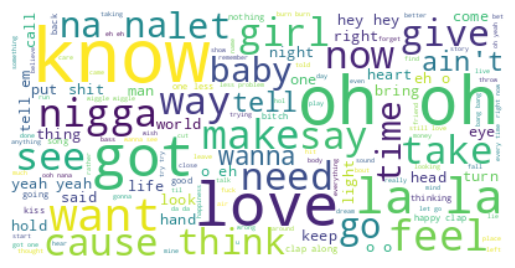

In [ ]:
# FONT_PATH = ''
# lyrics_text = ''
# for word in res:
#   lyrics_text = lyrics_text + ' ' + word

wordcloud = WordCloud(max_font_size = 60, background_color = 'white').generate(lyrics)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# KeyBERT

In [ ]:
pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 7.6 MB/s eta 0:00:00


### 전처리

In [ ]:
# 정규표현 토큰화
tokenizer = RegexpTokenizer('[\w"]+')
tokens = tokenizer.tokenize(lyrics.lower())

# 노이즈, 불용어 제거
en_stops = set(stopwords.words('english'))
res = [word for word in tokens if word not in en_stops]

# 품사 태깅
token_pos = nltk.pos_tag(res)

# 표제어 추출
wlem = nltk.WordNetLemmatizer()
lemma = list()

for word in tqdm(res):
  new_word = wlem.lemmatize(word)
  lemma.append(new_word)
print(len(lemma))

100%|██████████| 1168861/1168861 [00:05<00:00, 231254.80it/s]

1168861


In [ ]:
lyrics_text = ''
for word in tqdm(lemma):
  lyrics_text = lyrics_text + ' ' + word

100%|██████████| 1168861/1168861 [16:45<00:00, 1162.42it/s]


In [ ]:
from keybert import KeyBERT

kb_model = KeyBERT()
keywords = kb_model.extract_keywords(lyrics_text, top_n = 30, use_mmr = True, stop_words = 'english')
keywords

[('christmastree', 0.4969),
 ('xmas', 0.4307),
 ('reindeer', 0.3625),
 ('jingle', 0.3303),
 ('parade', 0.2839),
 ('sleigh', 0.2747),
 ('noel', 0.2617),
 ('grammys', 0.2491),
 ('crypt', 0.2086),
 ('barneys', 0.1956),
 ('children', 0.1917),
 ('sorprenden', 0.1894),
 ('filling', 0.1638),
 ('yogi', 0.1523),
 ('cashew', 0.1374),
 ('barcode', 0.1342),
 ('gangnamgangbuk', 0.1284),
 ('wishing', 0.1271),
 ('irocconthebeat', 0.1202),
 ('echo', 0.1197),
 ('teardrop', 0.1158),
 ('sudoku', 0.1095),
 ('amityville', 0.1091),
 ('bipolar', 0.105),
 ('prototype', 0.0883),
 ('levitating', 0.0788),
 ('cuz', 0.077),
 ('blocklist', 0.0759),
 ('당시의', 0.0412),
 ('carbs', 0.0178)]

In [ ]:
keywords = pd.DataFrame(keywords, columns = ['keyword', 'weight'])
keywords['year'] = 2023

In [ ]:
keywords.to_csv('KeyBERT_2023.csv')

In [ ]:
fig = go.Figure(data = px.bar(keywords, x = 'keyword', y = 'weight',text_auto = '.2', title = 'Top 5 Weight of Token with KeyBERT'))
fig.update_xaxes(title_text = "keyword")
fig.update_yaxes(title_text = "weight")
fig.update_traces(textfont_size=12, textposition="outside", cliponaxis=False)
fig.show()

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
lyrics_2014 = lyrics[lyrics.Year == 2014]
lyrics_2014= list(lyrics_2014.Lyrics)
lyrics_2015 = lyrics[lyrics.Year == 2015]
lyrics_2015= list(lyrics_2015.Lyrics)
lyrics_2016 = lyrics[lyrics.Year == 2016]
lyrics_2016= list(lyrics_2016.Lyrics)
lyrics_2017 = lyrics[lyrics.Year == 2017]
lyrics_2017= list(lyrics_2017.Lyrics)
lyrics_2018 = lyrics[lyrics.Year == 2018]
lyrics_2018= list(lyrics_2018.Lyrics)
lyrics_2019 = lyrics[lyrics.Year == 2019]
lyrics_2019= list(lyrics_2019.Lyrics)
lyrics_2020 = lyrics[lyrics.Year == 2020]
lyrics_2020= list(lyrics_2020.Lyrics)
lyrics_2021 = lyrics[lyrics.Year == 2021]
lyrics_2021= list(lyrics_2021.Lyrics)
lyrics_2022 = lyrics[lyrics.Year == 2022]
lyrics_2022= list(lyrics_2022.Lyrics)
lyrics_2023 = lyrics[lyrics.Year == 2023]
lyrics_2023= list(lyrics_2023.Lyrics)

In [ ]:
lyrics

,Year,Month,Week,Rank,Title,Artist,Lyrics
0,2014,1,2,1,The Monster,Eminem Featuring Rihanna,I'm friends with the monster\nThat's under my ...
1,2014,1,2,2,Timber,Pitbull Featuring Ke$ha,"It's going down, I'm yelling timber\nYou bette..."
2,2014,1,2,3,Counting Stars,OneRepublic,"Lately, I've been, I've been losing sleep\nDre..."
3,2014,1,2,4,Royals,Lorde,I've never seen a diamond in the flesh \nI cut...
4,2014,1,2,5,Say Something,A Great Big World & Christina Aguilera,"Say something, I'm giving up on you\nI'll be t..."
...,...,...,...,...,...,...,...
52295,2023,12,5,96,Winter Wonderland,Chloe,"[Intro]\r\nWalk\r\nWalk, walk, walking\r\nWalk..."
52296,2023,12,5,97,Run For The Hills,Tate McRae,"Hotels, late nights, hands through my hair\nLo..."
52297,2023,12,5,98,Que Onda,Calle 24 x Chino Pacas x Fuerza Regida,"Baby, me vuelves loco\r\nNo se esperó al hotel..."
52298,2023,12,5,99,Great Gatsby,Rod Wave,"(Pipe that shit up, TnT)\n(Trill got that juic..."


In [ ]:
lyrics_2023_1 = lyrics[(lyrics.Year == 2023)&(lyrics.Month == 1)]
lyrics_2023_1 = list(lyrics_2023_1.Lyrics)

In [ ]:
tfidf_df = pd.DataFrame(columns = ['year', 'month', 'doc_num', 'keyword', 'TF-IDF'])
tfidf_df

,year,month,doc_num,keyword,TF-IDF


In [ ]:
import numpy as np

In [ ]:
lyrics[lyrics.Title == 'Linus And Lucy (Peanuts Theme)']

,Unnamed: 0,Year,Month,Week,Rank,Title,Artist,Lyrics,Genre,BPM,...,color2,color3,rgb1,rgb2,rgb3,Featuring,neg,neu,pos,compound
41636,41636,2022,1,1,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,,국외영화,81.675,...,Orange Vibrant Dark,Cyan Muted Dark,"(55, 107, 137)","(226, 215, 188)","(29, 51, 59)",0.0,0.0,0.0,0.0,0.0
46848,46848,2022,12,5,49,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,,국외영화,81.675,...,Orange Vibrant Dark,Cyan Muted Dark,"(55, 107, 137)","(226, 215, 188)","(29, 51, 59)",0.0,0.0,0.0,0.0,0.0


In [ ]:
lyrics.iloc[41836, 6] = '  '
lyrics.iloc[47048, 6] = '  '

In [ ]:
stop_words = list(stopwords.words('english')) + list(stopwords.words('spanish')) + ['bam', 'bang', 'buzz', 'clap', 'click', 'ding', 'hiss', 'hoot', 'meow', 'moo',
               'pop', 'pow', 'ring', 'splash', 'whack', 'wham', 'whoosh', 'zip', 'yeah', 'woah',
               'oh', 'uh', 'ah', 'na', 'la', 'hey', 'ha', 'ooh', 'woo']


In [ ]:
import numpy as np

In [ ]:
for year in tqdm(range(2014, 2024)):
  for month in tqdm(range(1, 13)):
    df = lyrics[(lyrics.Year == year)&(lyrics.Month == month)]
    df_lyrics = list(df.Lyrics)
    tfidfv = TfidfVectorizer(stop_words = stop_words, token_pattern = '\\w+')
    tfidfv_vector = tfidfv.fit_transform(df_lyrics).toarray()
    vocab = tfidfv.vocabulary_
    for doc_index, doc in enumerate(tfidfv_vector):
      # 정렬 후, 상위 3개 추출
      sorted_indices = np.argsort(doc)[::-1]
      top_indices = sorted_indices[:3]

      for index in top_indices:
          if doc[index] > 0:
            keyword = list(vocab.keys())[list(vocab.values()).index(index)]
            row = { 'year': [year],
                    'month': [month],
                    'doc_num': [doc_index],
                    'keyword': [keyword],
                    'TF-IDF': [round(doc[index], 4)]
                  }
            new_row = pd.DataFrame.from_dict(row)
            tfidf_df = pd.concat([tfidf_df, new_row])

100%|██████████| 10/10 [38:29<00:00, 230.92s/it]


In [ ]:
tfidf_df

,year,month,doc_num,keyword,TF-IDF
0,2014,1,0,oh,0.2893
0,2014,1,0,crazy,0.2816
0,2014,1,0,monster,0.2603
0,2014,1,1,wooooah,0.6140
0,2014,1,1,timber,0.5372
...,...,...,...,...,...
0,2023,12,498,century,0.3033
0,2023,12,498,sober,0.2935
0,2023,12,499,gotta,0.4519
0,2023,12,499,tonight,0.3556


In [ ]:
tfidf_df.to_csv('tf_idf.csv')

In [ ]:
tfidf_df

,year,month,doc_num,keyword,TF-IDF
0,2014,1,0.0,oh,0.2890
0,2014,1,0.0,crazy,0.2814
0,2014,1,0.0,monster,0.2601
0,2014,1,1.0,wooooah,0.6140
0,2014,1,1.0,timber,0.5372
...,...,...,...,...,...
0,2017,4,398.0,else,0.3488
0,2017,4,398.0,ooh,0.3283
0,2017,4,399.0,human,0.7478
0,2017,4,399.0,blame,0.5066


In [ ]:
tfidf_df = tfidf_df.drop(columns = 'song_num')

In [ ]:
tfidf_df = tfidf_df[['year', 'month', 'doc_num', 'keyword', 'TF-IDF']]
tfidf_df

,year,month,doc_num,keyword,TF-IDF
0,2014,1,0.0,oh,0.2890
0,2014,1,0.0,crazy,0.2814
0,2014,1,0.0,monster,0.2601
0,2014,1,1.0,wooooah,0.6140
0,2014,1,1.0,timber,0.5372
...,...,...,...,...,...
0,2017,4,159.0,shit,0.1609
0,2017,4,159.0,want,0.1538
0,2017,4,159.0,life,0.1467
0,2017,4,160.0,nah,0.8794


In [ ]:
tfidf_df.to_csv('_201703.csv')

In [ ]:
tfidfv = TfidfVectorizer(stop_words = list(stopwords.words('english')), token_pattern = '\\w+')
tfidfv_vector = tfidfv.fit_transform(lyrics_2023_1).toarray()
len(tfidfv_vector)
# print(tfidfv.vocabulary_)

400

In [ ]:
tfidfv_vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(tfidfv.vocabulary_)

{'want': 15095, 'lot': 8144, 'christmas': 2667, 'one': 9648, 'thing': 13890, 'need': 9312, 'care': 2258, 'presents': 10783, 'underneath': 14567, 'tree': 14291, 'could': 3252, 'ever': 4959, 'know': 7611, 'make': 8300, 'wish': 15320, 'come': 2929, 'true': 14366, 'hang': 6388, 'stocking': 13229, 'upon': 14639, 'fireplace': 5357, 'santa': 12034, 'claus': 2756, 'happy': 6406, 'toy': 14183, 'day': 3643, 'baby': 945, 'ask': 793, 'much': 9088, 'even': 4955, 'snow': 12802, 'gonna': 6017, 'keep': 7484, 'waiting': 15064, 'mistletoe': 8886, 'list': 7981, 'send': 12241, 'north': 9451, 'pole': 10573, 'saint': 11978, 'nick': 9376, 'stay': 13167, 'awake': 907, 'hear': 6490, 'magic': 8274, 'reindeer': 11452, 'click': 2776, 'cause': 2358, 'tonight': 14108, 'holding': 6663, 'tight': 13981, 'lights': 7916, 'shining': 12411, 'brightly': 1829, 'everywhere': 4970, 'sound': 12927, 'children': 2571, 'laughter': 7747, 'fills': 5322, 'air': 376, 'everyone': 4966, 'singing': 12573, 'sleigh': 12687, 'bells': 1293,

In [ ]:
tfidf_df = pd.DataFrame(columns = ['year', 'month', 'song_num', 'keyword', 'TF-IDF'])
tfidf_df

,doc_num,keyword,TF-IDF


In [ ]:
for doc_index, doc in tqdm(enumerate(tfidfv_vector)):

    # 정렬 후, 상위 3개 추출
    sorted_indices = np.argsort(doc)[::-1]
    top_indices = sorted_indices[:3]

    for index in top_indices:
        if doc[index] > 0:
          keyword = list(vocab.keys())[list(vocab.values()).index(index)]
          row = {'doc_num': [doc_index],
                  'keyword': [keyword],
                  'TF-IDF': [round(doc[index], 4)]
                }
          new_row = pd.DataFrame.from_dict(row)
          tfidf_df = pd.concat([tfidf_df, new_row])

400it [00:02, 189.30it/s]


In [ ]:
vocab = tfidfv.vocabulary_

In [ ]:
import numpy as np

In [ ]:
tfidf_df

,doc_num,keyword,TF-IDF
0,0,argumentative,0.5479
0,0,dreaming,0.4062
0,0,dogged,0.2387
0,1,argumentative,0.3536
0,1,crashed,0.3424
...,...,...,...
0,398,destroy,0.2927
0,398,agent,0.2784
0,399,descansen,0.2899
0,399,deserves,0.1933


In [ ]:
tfidf_df.keyword.value_counts().head(20)

,count
keyword,
circus,29
consider,20
caramel,15
4s,15
clarito,13
argumentative,12
destination,12
boaw,12
buenas,9


In [ ]:
tfidfv.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'after',
           'again',
           'against',
           'ain',
           'all',
           'am',
           'an',
           'and',
           'any',
           'are',
           'aren',
           "aren't",
           'as',
           'at',
           'be',
           'because',
           'been',
           'before',
           'being',
           'below',
           'between',
           'both',
           'but',
           'by',
           'can',
           'couldn',
           "couldn't",
           'd',
           'did',
           'didn',
           "didn't",
           'do',
           'does',
           'doesn',
           "doesn't",
           'doing',
           'don',
           "don't",
           'down',
           'during',
           'each',
           'few',
           'for',
           'from',
           'further',
           'had',
           'hadn',
           "hadn't",
           'has',
     

In [ ]:
res = pd.DataFrame.from_dict([tfidfv.vocabulary_]).T
res.head(20)

,0
want,15095
lot,8144
christmas,2667
one,9648
thing,13890
need,9312
care,2258
presents,10783
underneath,14567
tree,14291


# Sentimental Analysis

In [ ]:
len(list(lyrics.Lyrics))

52300

In [ ]:
lyrics_score = pd.DataFrame(columns = ['neg', 'neu', 'pos', 'compound'])
lyrics_score

,neg,neu,pos,compound


In [ ]:
lyrics[lyrics.Title == 'Linus And Lucy (Peanuts Theme)']

,Year,Month,Week,Rank,Title,Artist,Lyrics,neg,neu,pos,compound
41836,2022,1,1,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,NaN,0.0,0.0,0.0,0.0
47048,2022,12,5,49,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,NaN,0.0,0.0,0.0,0.0


In [ ]:
lyrics.iloc[41836, 6] = '  '
lyrics.iloc[47048, 6] = '  '

In [ ]:
lyrics['neg'] = 0
lyrics['neu'] = 0
lyrics['pos'] = 0
lyrics['compound'] = 0

sia = SentimentIntensityAnalyzer()

for i in tqdm(range(len(lyrics))):
  lyric = lyrics.iloc[i].Lyrics
  scores = sia.polarity_scores(lyric)

  lyrics.iloc[i, 7] = scores['neg']
  lyrics.iloc[i, 8] = scores['neu']
  lyrics.iloc[i, 9] = scores['pos']
  lyrics.iloc[i, 10] = scores['compound']

  0%|          | 0/52300 [00:00<?, ?it/s]<ipython-input-17-e604e35a7a3c>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lyrics.iloc[i, 7] = scores['neg']
<ipython-input-17-e604e35a7a3c>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lyrics.iloc[i, 8] = scores['neu']
<ipython-input-17-e604e35a7a3c>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.172' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lyrics.iloc[i, 9] = scores['pos']
<ipython-input-17-e604e35a7a3c>:15: FutureWarning: Setting an item of inco

In [ ]:
lyrics.to_csv('data/lyrics_sentimental.csv')
